<a href="https://colab.research.google.com/github/xhze2016/Machine-Learning/blob/main/Diabetes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Checking whether the dataset is balanced or not
data = pd.read_csv('diabetes1.csv')
data.head(3)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8


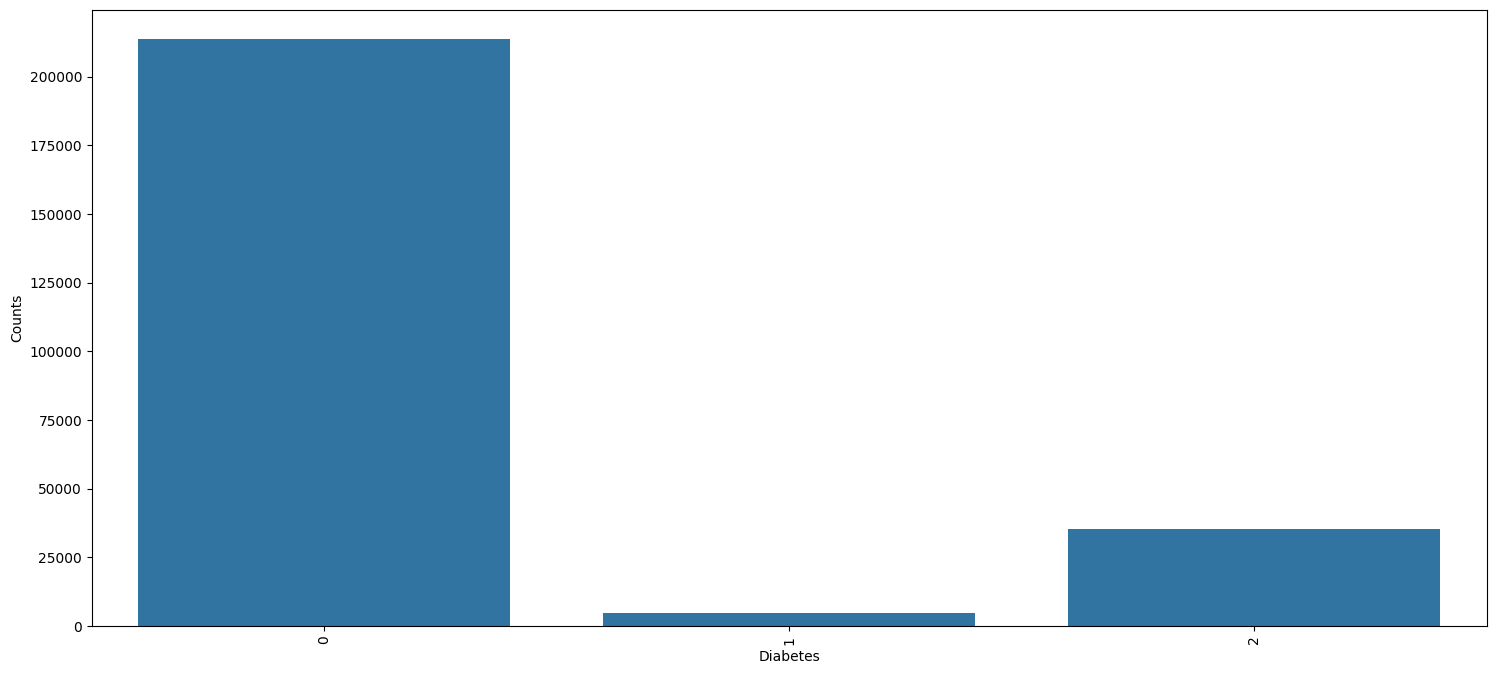

In [ ]:
diabetes_counts = data['Diabetes_012'].value_counts()
temp_df = pd.DataFrame({
	"Diabetes": diabetes_counts.index,
	"Counts": diabetes_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Diabetes", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = data.loc[data['Diabetes_012'] != 1]
data.loc[data['Diabetes_012'] == 2, "Diabetes_012"] =1
data.sample(8)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
227515,0,0,0,1,27,1,0,0,1,1,...,1,0,1,0,0,0,1,6,5,8
52580,0,0,0,1,24,1,0,0,0,1,...,1,0,4,0,14,0,1,8,5,5
217137,0,0,1,1,29,1,0,0,1,1,...,1,0,2,0,0,0,1,13,5,5
92787,0,0,1,1,24,1,0,0,1,0,...,1,0,2,0,0,0,1,5,6,8
243086,0,0,0,1,24,1,0,0,1,0,...,1,0,5,15,30,0,0,6,5,8
202018,1,1,1,1,27,0,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
82225,0,1,1,1,28,1,1,0,1,0,...,1,0,3,0,0,0,0,10,5,3
180927,0,1,1,1,25,0,0,0,0,1,...,1,0,2,0,3,0,0,10,5,8


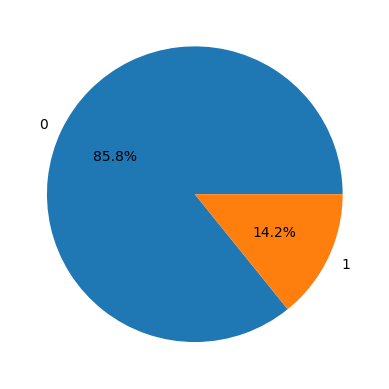

In [ ]:
x = data['Diabetes_012'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()


In [ ]:
X = data.drop('Diabetes_012', axis=1)
Y = data['Diabetes_012']

X_train, X_val,\
	Y_train, Y_val = train_test_split(X, Y,
									test_size=0.2,
									random_state=10)
X_train.shape, X_val.shape


((199239, 21), (49810, 21))

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape


((341920, 21), (341920,))

Accuracy of the model is = 0.8595864284280265


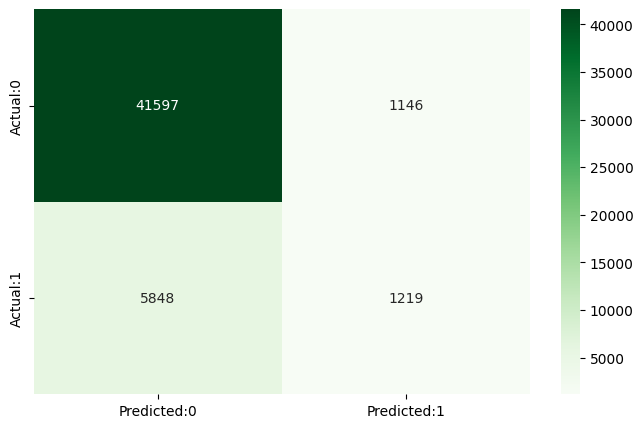

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     42743
           1       0.52      0.17      0.26      7067

    accuracy                           0.86     49810
   macro avg       0.70      0.57      0.59     49810
weighted avg       0.83      0.86      0.83     49810



In [ ]:
# normalization of the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_val)
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(Y_val, Y_pred))
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_val, Y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(Y_val, Y_pred))

